In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
import joblib

In [2]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_excel("gesture_data.xlsx")

In [4]:
len(df)

53564

In [5]:
len(df.columns)

442

In [7]:
df.dropna(axis = 0, inplace = True)

In [8]:
x = df.iloc[:, :441]
y = df.iloc[:, 441:]

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)

In [10]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
y_hat = classifier.predict(x_test)

In [12]:
accuracy = accuracy_score(y_test, y_hat)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.99


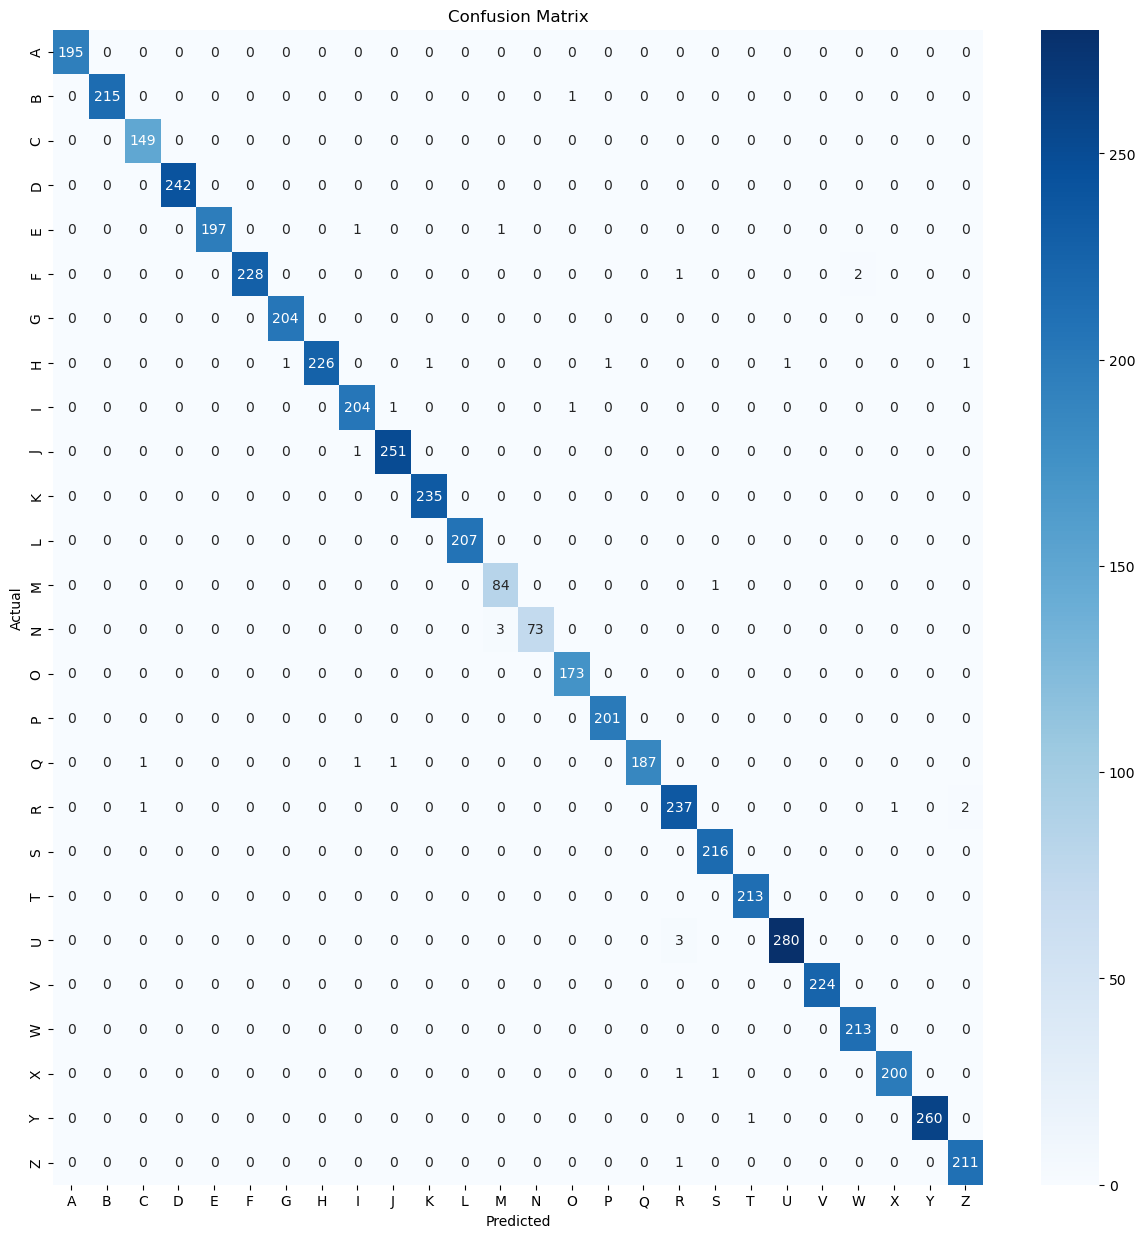

In [13]:
cm = confusion_matrix(y_test, y_hat)

plt.figure(figsize = (15, 15))
sns.heatmap(cm, annot = True, fmt = "d", cmap= "Blues", xticklabels = df["Label"].unique(), yticklabels = df["Label"].unique())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [14]:
joblib.dump(classifier, 'gesture recognition model.pkl')

['gesture recognition model.pkl']

In [15]:
y.value_counts().reset_index().sort_values("Label", ascending = True).reset_index(drop = True)

,Label,count
0,A,1952
1,B,2068
2,C,1546
3,D,2132
4,E,2048
5,F,2628
6,G,2124
7,H,2183
8,I,2169
9,J,2251


In [16]:
y["Label"].nunique()

26